In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df = pd.read_csv("final_train-data1.csv")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Diesel,Other,Petrol,Automatic,Manual
0,0,Honda,Ahmedabad,2007,0.999803,2,17.679168,1.043464,1.035251,1.058602,1.043379,0.586006,0,0,1,0,1
1,1,Land,Mumbai,2008,1.000580,1,18.778682,0.891366,1.035251,1.058602,0.886922,0.651118,1,0,0,1,0
2,2,Honda,Pune,2004,0.991265,1,17.679168,1.043464,1.035251,1.058602,1.053012,1.006371,0,0,1,0,1
3,3,Land,Coimbatore,2008,0.998395,2,17.679168,1.043464,1.035251,1.058602,0.791387,0.651118,0,0,1,0,1
4,4,Hyundai,Coimbatore,2004,1.001023,2,17.679168,1.043464,1.035251,1.058602,1.050156,1.006371,0,0,1,0,1


In [14]:
df.index

RangeIndex(start=0, stop=6019, step=1)

In [15]:
train_data = df.iloc[:5000]
test_data = df.iloc[5001 :6019]

In [16]:
# Multiple regression
# develop multiple regression model by using engine and power (consider w0,w1,w2 = 1)
w0=w1=w2=1
train_data["predicted_price"] = w0 + w1*train_data["Engine"]+ w2*train_data["Power"]

C:\Users\mukes\AppData\Local\Temp\ipykernel_13676\1937258708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["predicted_price"] = w0 + w1*train_data["Engine"]+ w2*train_data["Power"]


In [17]:
#compute MSE,RMSE and RSS for the model
# Calculate the predicted values
predicted_values = w0 + w1*train_data["Engine"]+ w2*train_data["Power"]

# Calculate the squared errors
squared_errors = (train_data["Price"] - predicted_values)**2

# Calculate the mean squared error
mse = np.mean(squared_errors)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the residual sum of squares
rss = np.sum(squared_errors)

# Print the results
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"RSS: {rss}")

MSE: 4.037887059808988
RMSE: 2.00944944196389
RSS: 20189.43529904494


In [19]:
# calc w from least square method
n=5000
train_data["Constant"]=1
Y=np.asanyarray(train_data["Price"])
X=np.asanyarray(train_data[["Constant", "Power", "Engine"]])
W=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
W = (X*x)
w0, w1, w2=W
print(w0,w1,w2)

0.5247747617402568 0.4772919156079498 -0.0019906711424717213


C:\Users\mukes\AppData\Local\Temp\ipykernel_13676\1310507410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Constant"]=1


In [21]:
train_data["New_price"] = w0 + w1*train_data["Power"]+w2*train_data["Engine"]
train_data.head()

C:\Users\mukes\AppData\Local\Temp\ipykernel_13676\1942727868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["New_price"] = w0 + w1*train_data["Power"]+w2*train_data["Engine"]


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Diesel,Other,Petrol,Automatic,Manual,predicted_price,Constant,New_price
0,0,Honda,Ahmedabad,2007,0.999803,2,17.679168,1.043464,1.035251,1.058602,1.043379,0.586006,0,0,1,0,1,3.078715,1,1.016815
1,1,Land,Mumbai,2008,1.000580,1,18.778682,0.891366,1.035251,1.058602,0.886922,0.651118,1,0,0,1,0,2.926617,1,1.017117
2,2,Honda,Pune,2004,0.991265,1,17.679168,1.043464,1.035251,1.058602,1.053012,1.006371,0,0,1,0,1,3.078715,1,1.016815
3,3,Land,Coimbatore,2008,0.998395,2,17.679168,1.043464,1.035251,1.058602,0.791387,0.651118,0,0,1,0,1,3.078715,1,1.016815
4,4,Hyundai,Coimbatore,2004,1.001023,2,17.679168,1.043464,1.035251,1.058602,1.050156,1.006371,0,0,1,0,1,3.078715,1,1.016815


In [33]:
# calc performance of model
train_data["squared_error"] = (train_data["Price"] - train_data["New_price"])**2

mse = train_data["squared_error"].mean()
rmse = np.sqrt(mse)
rss = np.sum(train_data["squared_error"])

print("MSE:", mse)
print("RMSE:", rmse)
print("RSS:",rss)

MSE: 0.002323338738367744
RMSE: 0.048201024246044236
RSS: 11.61669369183872


C:\Users\mukes\AppData\Local\Temp\ipykernel_13676\3465561198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["squared_error"] = (train_data["Price"] - train_data["New_price"])**2


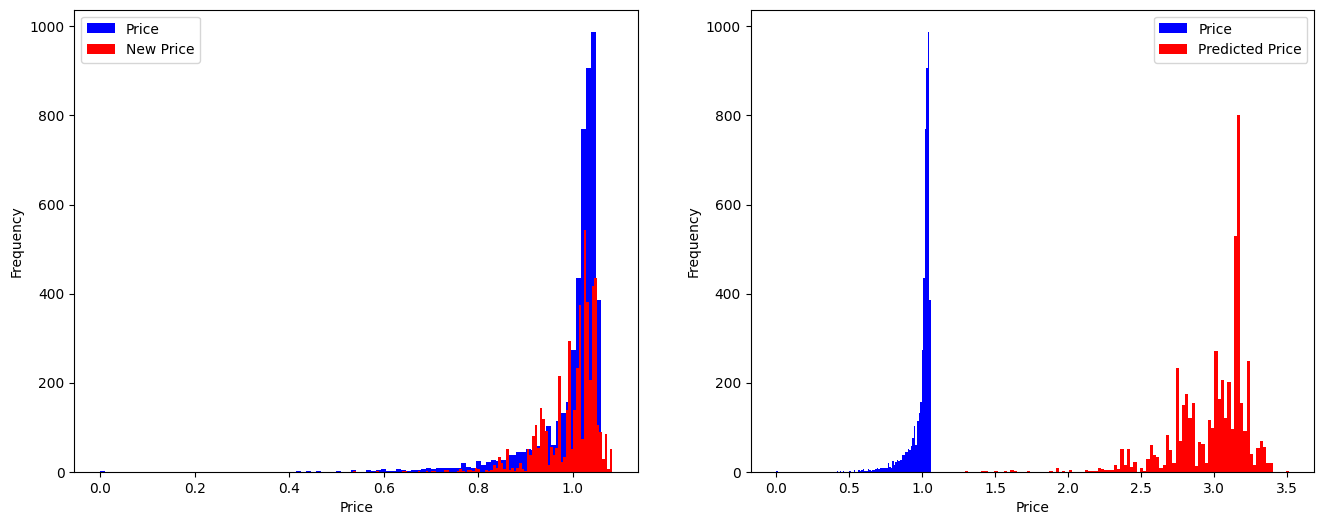

In [37]:
#make 2 histograms 1st with price vs new price and 2nd price vs predicted price 

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(train_data["Price"], bins=100, color="blue", label="Price")
axes[0].hist(train_data["New_price"], bins=100, color="red", label="New Price")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Frequency")
axes[0].legend()

axes[1].hist(train_data["Price"], bins=100, color="blue", label="Price")
axes[1].hist(train_data["predicted_price"], bins=100, color="red", label="Predicted Price")
axes[1].set_xlabel("Price")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.show()

In [ ]:
# implemetn gradient descent algo to find optimal values widths
H= np.asanyarray (train_data[["Constant", "Power", "Engine"]])

Y= np.asanyarray(train_data["Price"])

W = np.zeros((H.shape[1],200))

dw = np.zeros((H.shape[1],200 ))

r1 = 0.5247747617402236 + 0.0001

W[0,0]=0.5247747617402236 +(2*0.1e-3)

W[1,0]=0.47729191560785383 +(2*0.1e-3)

W[2,0]=-0.0019906711423494025+(2*0.1e-3)

cost = list()

#print(H.shape)

#print(W.shape)

eta= 0.1e-3

##print(we, wl, cost, power)

for i in range(199):

    predicted = np.dot(W[i],H.T)

print(np.sum(predicted))

cost.append(np.sum(np.abs(predicted-Y)))

print(cost[i])

dw[:,i] = (np.dot (H.T, (Y-np.dot (H, W[:,i]))))

# print(dw)

W[:,i+1] = W[:,i]-eta*dw[:,i]